In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('AllStationsTempRHRainSolRadDOYTOD.csv')
df.head()

,StationID,Date,Time,Temp,RelHum,Rain,SolarRad,doy,tod
0,1,2020-10-01,00:00,19.8,81.0,0.0,0.0,274,1
1,1,2020-10-01,0:30,19.5,82.0,0.0,0.0,274,2
2,1,2020-10-01,1:00,19.7,82.0,0.0,0.0,274,3
3,1,2020-10-01,1:30,19.8,83.0,0.0,0.0,274,4
4,1,2020-10-01,2:00,19.3,85.0,0.0,0.0,274,5


In [2]:
# Aggregation

df_aggregated = df.groupby(['StationID','Date']).agg({'Temp':'mean', 'RelHum':'mean', 'Rain':'sum', 'SolarRad':'sum', 'doy':'mean'})
df_aggregated = df_aggregated.reset_index()
df_aggregated['doy'] = df_aggregated['doy'].astype(int)
df_aggregated.head(100)

,StationID,Date,Temp,RelHum,Rain,SolarRad,doy
0,1,2020-10-01,21.625000,86.479167,17.6,7904.0,274
1,1,2020-10-02,13.041667,91.833333,14.6,2281.0,275
2,1,2020-10-03,9.902083,88.916667,16.6,2589.0,276
3,1,2020-10-04,11.883333,89.416667,0.6,3166.0,277
4,1,2020-10-05,13.687500,92.354167,0.0,2951.0,278
...,...,...,...,...,...,...,...
95,1,2021-01-04,24.395833,66.895833,0.0,14793.0,4
96,1,2021-01-05,21.045833,87.104167,30.8,4668.0,5
97,1,2021-01-06,25.364583,75.770833,0.0,13699.0,6
98,1,2021-01-07,24.758333,61.208333,0.0,14824.0,7


In [3]:
df_aggregated.shape

(9899, 7)

In [4]:
# doy aggregation
# [01/10 - 31/03] = 182 days

df_days = df_aggregated.groupby(['StationID','doy'])[['Temp','RelHum','Rain','SolarRad']].mean()
df_days = df_days.reset_index()
df_days.head(100)

,StationID,doy,Temp,RelHum,Rain,SolarRad
0,1,1,25.400694,56.916667,0.000000,16691.000000
1,1,2,22.227778,72.590278,0.200000,10802.666667
2,1,3,23.010417,66.729167,0.000000,16440.333333
3,1,4,24.172222,68.263889,0.000000,14809.000000
4,1,5,21.702083,77.534722,10.266667,11129.333333
...,...,...,...,...,...,...
95,1,279,14.378472,83.437500,6.866667,8543.333333
96,1,280,13.938194,78.923611,0.000000,11411.666667
97,1,281,15.144444,74.631944,0.200000,12377.333333
98,1,282,13.399306,71.736111,0.000000,11974.666667


In [5]:
df_days.shape

(3458, 6)

In [6]:
# sort by doy

import pandas as pd

# Get the unique values of StationID
unique_station_ids = df_days['StationID'].unique()

# Create an empty list to hold the dataframes
split_dfs = []

# Loop over the unique values of StationID and split the dataset accordingly
for station_id in unique_station_ids:
    df_temp = df_days[df_days['StationID'] == station_id]
    firstMonthsYear = df_temp[df_temp["doy"] <= 90] # 31/03
    lastMonthsYear = df_temp[df_temp["doy"] >= 274] # 01/10
    df_season = pd.concat([lastMonthsYear, firstMonthsYear])

    split_dfs.append(df_season[['Temp','RelHum','Rain','SolarRad']])
    
    

In [7]:
# Get the length of the first two dimensions of the array
dim1 = len(split_dfs)
dim2 = split_dfs[0].shape[0]
dim3 = split_dfs[0].shape[1]

print(str(dim1))
print(str(dim2))
print(str(dim3))


df_array = np.zeros((dim1, dim2, dim3))

# Copy the values from the dataframes to the new array
for i, df in enumerate(split_dfs):
    df_array[i, :, :] = df.values

19
182
4


In [8]:
# ver estacoes

stations = pd.read_csv('./data_csv/SIMAGROStationsList.csv')
names = stations[['StationName','StationID']]
print(names)

                             StationName  StationID
0      Pinheiro Machado (Olival Batalha)          1
1               Piratini (Olival Olivae)          2
2           São Sepé (Olival Prosperato)          3
3                        Itaqui (Vimaer)          4
4          Maçambara (Fazenda Espinilho)          5
5             Rosário do Sul (Vila Temp)          6
6                 Getúlio Vargas (Ideal)          7
7                    Ilópolis (Ibramate)          8
8   Barra do Ribeiro (Olival Prosperato)          9
9              Cachoeira do Sul (Capané)         10
10             Canguçu (Olival Capolivo)         11
11          Herval (Fazenda Pitangueira)         12
12        Lavras do Sul (Fazenda Galpão)         13
13                      São Borja (DDPA)         14
14           Bossoroca (Sindicato Rural)         15
15             Jaguari (Mirante Minuzzi)         16
16                  Caxias do Sul (DDPA)         18
17          Porto Vera Cruz (Prefeitura)         19
18          

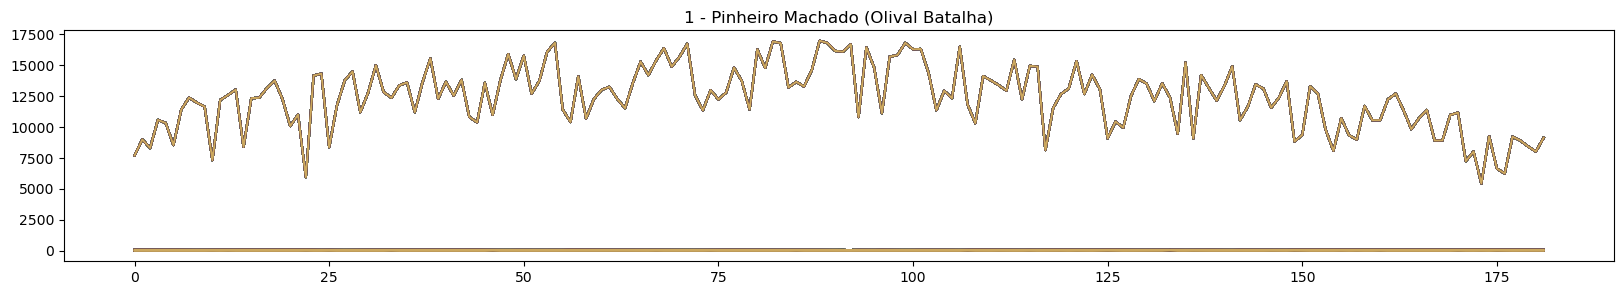

In [39]:
# grid of plots
import os
import math
# Essential Libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

for index, item in enumerate(df_array):
    plt.figure(figsize=(20,3))
    
    stationId = unique_station_ids[index]
    
    result = names[names['StationID'] == stationId]
    stationName = result.iloc[0]['StationName']
    plt.title(str(stationId)+" - "+stationName)
    
    
    for i in item:
        plt.plot(item, '-',c=(np.random.random(), np.random.random(), np.random.random()))
        
    break



In [98]:
temp = []
relhum = []
rainfall = []
solarrad = []


for index, item in enumerate(df_array):
    plt.figure(figsize=(20,3))
    for i in range(0,len(item)):
        #plt.plot(item[0][3], '-',c=(np.random.random(), np.random.random(), np.random.random()))

        temp.append(item[i][0])
        relhum.append(item[i][1])
        rainfall.append(item[i][2])
        solarrad.append(item[i][3])
        
    break




<Figure size 2000x300 with 0 Axes>

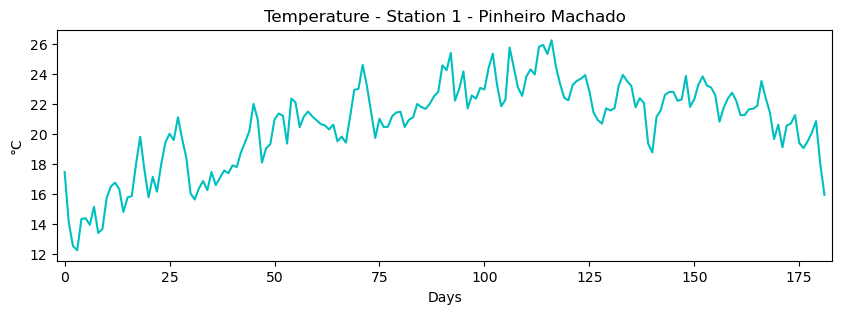

In [189]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,3))
plt.title("Temperature - "+"Station "+str(stationId)+" - "+"Pinheiro Machado")
plt.plot(temp,c='c')
plt.xlabel("Days")
plt.ylabel("°C")
plt.margins(x=0.01)
plt.savefig('ex_temp.png', bbox_inches='tight', pad_inches=0.05)
plt.show()


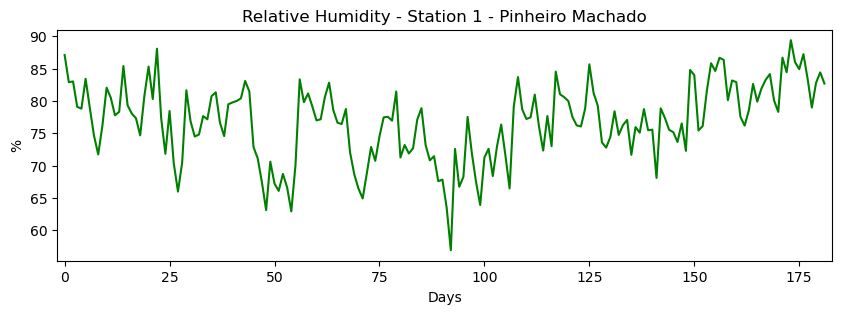

In [191]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,3))
plt.title("Relative Humidity - "+"Station "+str(stationId)+" - "+"Pinheiro Machado")
plt.plot(relhum, c='g')
plt.xlabel("Days")
plt.ylabel("%")
plt.margins(x=0.01)
plt.savefig('ex_relhum.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

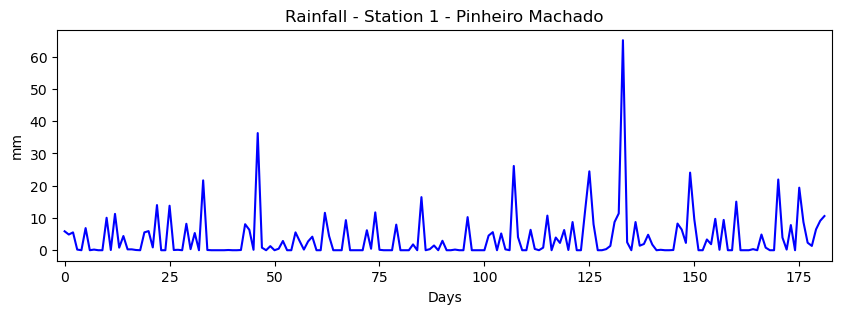

In [192]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,3))
plt.title("Rainfall - "+"Station "+str(stationId)+" - "+"Pinheiro Machado")
plt.plot(rainfall, c='b')
plt.xlabel("Days")
plt.ylabel("mm")
plt.margins(x=0.01)
plt.savefig('ex_rainfall.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

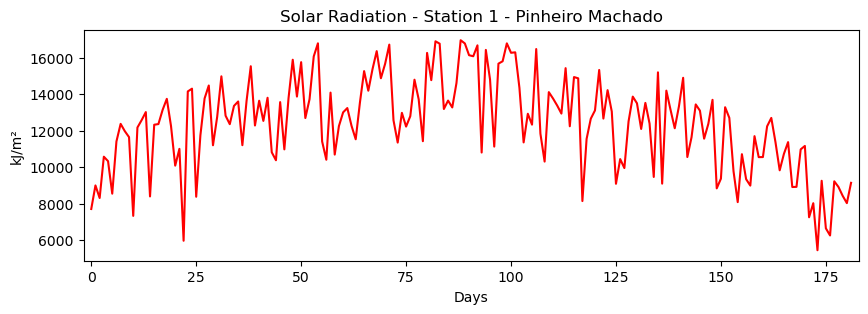

In [194]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,3))
plt.title("Solar Radiation - "+"Station "+str(stationId)+" - "+"Pinheiro Machado")
plt.plot(solarrad, c='r')
plt.xlabel("Days")
plt.ylabel("kJ/m²")
plt.margins(x=0.01)
plt.savefig('ex_solarrad.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [10]:
# SILHOUETTE SCORE

# silhouette score
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from tslearn.clustering import TimeSeriesKMeans, silhouette_score

scores = []

for i in range(2,df_array.shape[0]):
    score_I = []
    
    for r in range(1,11):
        model = TimeSeriesKMeans(n_clusters=i, metric="softdtw", n_init=10, max_iter=200)
        y_pred = model.fit_predict(df_array)
        score=silhouette_score(df_array, y_pred, metric="softdtw")
        score_I.append(score)
        #print('Clusters = '+str(i)+'  Silhouette Score: %.3f' % score)
        #print('run '+str(r)+': '+str(score))
    
    #print("scores: "+str(score_I))
    scores.append(score_I)

c=2
for i in scores:
    avg = sum(i)/len(i)
    print('Clusters = '+str(c)+'  Avg. Silhouette Score: %.3f' % avg)
    c+=1

Clusters = 2  Avg. Silhouette Score: 0.158
Clusters = 3  Avg. Silhouette Score: 0.146
Clusters = 4  Avg. Silhouette Score: 0.168
Clusters = 5  Avg. Silhouette Score: 0.186
Clusters = 6  Avg. Silhouette Score: 0.173
Clusters = 7  Avg. Silhouette Score: 0.178
Clusters = 8  Avg. Silhouette Score: 0.177
Clusters = 9  Avg. Silhouette Score: 0.182
Clusters = 10  Avg. Silhouette Score: 0.152
Clusters = 11  Avg. Silhouette Score: 0.164
Clusters = 12  Avg. Silhouette Score: 0.163
Clusters = 13  Avg. Silhouette Score: 0.163
Clusters = 14  Avg. Silhouette Score: 0.146
Clusters = 15  Avg. Silhouette Score: 0.126
Clusters = 16  Avg. Silhouette Score: 0.094
Clusters = 17  Avg. Silhouette Score: 0.064
Clusters = 18  Avg. Silhouette Score: 0.041


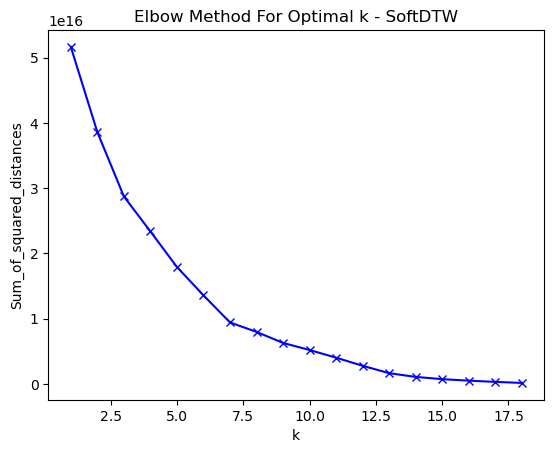

In [27]:
from tslearn.clustering import TimeSeriesKMeans

Sum_of_squared_distances = []
K = range(1,df_array.shape[0])
for k in K:
    km = TimeSeriesKMeans(n_clusters=k, metric="softdtw", n_init=10, max_iter=200)
    km = km.fit(df_array)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k - SoftDTW')
plt.show()

In [9]:
import numpy as np
from sklearn.cluster import SpectralClustering

def consensus_clustering(L, n_clusters, n_runs):
   
   # Calculate the consensus clustering from a list of labels obtained from multiple runs of a clustering algorithm.####

    #Parameters:
    #L (list of numpy arrays): List of length n_runs containing numpy arrays with shape (n_samples,) with labels obtained from each run of the clustering algorithm.
    #n_clusters (int): Number of clusters used in the clustering algorithm.
    #n_runs (int): Number of runs of the clustering algorithm.#

    #Returns:
    #list: List with length n_samples containing the consensus labels.
    
    n_samples = L[0].shape[0]
    W = np.zeros((n_samples, n_samples))

    for i in range(n_runs):
        L_i = L[i]
        for j in range(n_samples):
            for k in range(j + 1, n_samples):
                if L_i[j] == L_i[k]:
                    W[j, k] += 1
                    W[k, j] += 1

    W /= n_runs

    model = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    model.fit(W)

    return model.labels_

In [12]:
# Clusters = 2

from tslearn.clustering import TimeSeriesKMeans

y_pred_array_2 = []
    
for i in range(1,11):
    model_2 = TimeSeriesKMeans(n_clusters=2, metric="softdtw", n_init=10, max_iter=200)
    y_pred_2 = model_2.fit_predict(df_array)
    y_pred_array_2.append(y_pred_2)
        
        
for i in y_pred_array_2:
    print(i)

[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0]
[1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1]
[1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1]
[1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1]
[1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1]
[1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1]
[1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1]
[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0]
[1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1]
[1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1]


In [13]:
consensus_cluster_2 = consensus_clustering(y_pred_array_2, 2, len(y_pred_array_2))
print(consensus_cluster_2)

[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0]


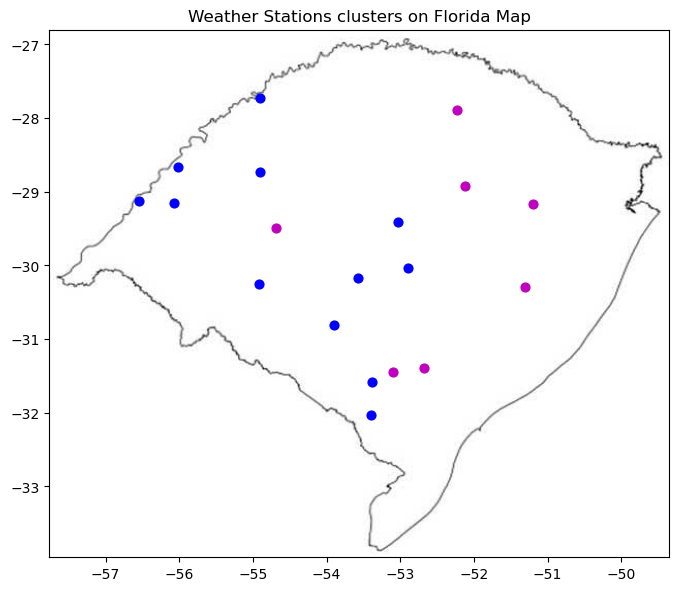

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stations_coord = stations[['StationName','StationID','latitude', 'longitude']]

stations_sort = stations_coord.sort_values('StationID')
df_plot = stations_sort.copy()

BBox = ((-57.766, -49.351, #longitude
          -33.962, -26.800)) #latitude

df_plot['cluster'] = consensus_cluster_2

df_c1 = df_plot.loc[df_plot['cluster'] == 0]
df_c2 = df_plot.loc[df_plot['cluster'] == 1]

rs_map = plt.imread('rs_map_white.jpeg')
fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(stations_coord.longitude, stations_coord.latitude, zorder=1, alpha=1, c='b', s=10)
ax.scatter(df_c1.longitude, df_c1.latitude, zorder=1, alpha=1, c='b', s=40)
ax.scatter(df_c2.longitude, df_c2.latitude, zorder=1, alpha=1, c='m', s=40)
    
ax.set_title('Weather Stations clusters on Florida Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(rs_map, zorder=0, extent = BBox, aspect= 'equal')

In [15]:
# Clusters = 3

from tslearn.clustering import TimeSeriesKMeans

y_pred_array_3 = []

for i in range(1,11):
    model_3 = TimeSeriesKMeans(n_clusters=3, metric="softdtw", n_init=10, max_iter=200)
    y_pred_3 = model_3.fit_predict(df_array)
    y_pred_array_3.append(y_pred_3)


for i in y_pred_array_3:
    print(i)

[0 0 0 2 2 2 1 1 1 0 0 0 0 2 2 0 1 1 0]
[0 0 0 1 1 1 2 2 2 0 2 0 0 1 1 2 2 1 1]
[1 0 1 2 2 2 0 0 0 1 0 1 1 2 2 0 0 1 1]
[1 1 1 2 2 2 0 0 0 1 0 1 1 2 2 1 0 0 1]
[1 2 1 1 1 1 0 0 0 2 0 2 1 2 2 2 0 0 2]
[1 1 1 0 0 1 2 2 2 1 2 1 1 0 0 0 2 0 0]
[0 0 0 2 2 2 1 1 1 0 0 0 0 2 0 0 1 1 0]
[2 2 2 1 1 1 0 0 0 2 0 2 2 1 1 2 0 1 2]
[2 2 2 1 1 1 0 0 0 2 2 2 2 1 1 2 0 0 2]
[1 1 1 0 0 1 2 2 2 1 2 1 1 0 0 0 2 0 0]


In [16]:
consensus_cluster_3 = consensus_clustering(y_pred_array_3, 3, len(y_pred_array_3))
print(consensus_cluster_3)

[1 1 1 0 0 0 2 2 2 1 2 1 1 0 0 1 2 2 1]


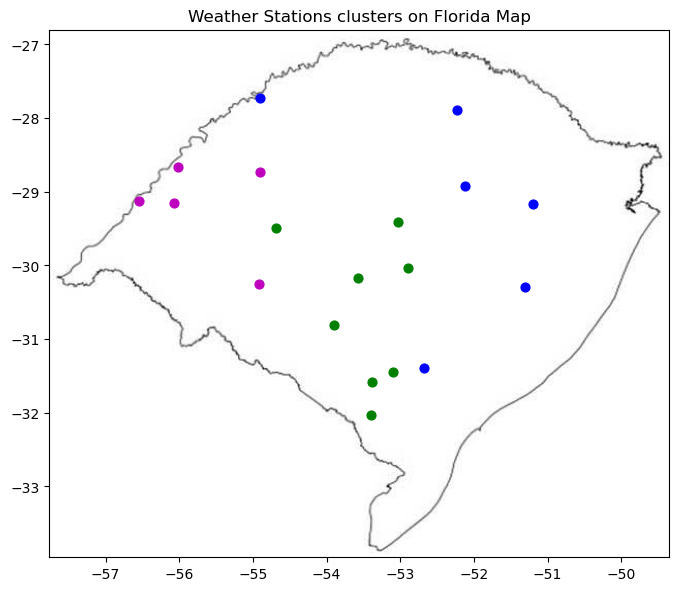

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stations_coord = stations[['StationName','StationID','latitude', 'longitude']]

stations_sort = stations_coord.sort_values('StationID')
df_plot = stations_sort.copy()

BBox = ((-57.766, -49.351, #longitude
          -33.962, -26.800)) #latitude

df_plot['cluster'] = consensus_cluster_3

df_c1 = df_plot.loc[df_plot['cluster'] == 0]
df_c2 = df_plot.loc[df_plot['cluster'] == 1]
df_c3 = df_plot.loc[df_plot['cluster'] == 2]

rs_map = plt.imread('rs_map_white.jpeg')
fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(stations_coord.longitude, stations_coord.latitude, zorder=1, alpha=1, c='b', s=10)
ax.scatter(df_c1.longitude, df_c1.latitude, zorder=1, alpha=1, c='m', s=40)
ax.scatter(df_c2.longitude, df_c2.latitude, zorder=1, alpha=1, c='g', s=40)
ax.scatter(df_c3.longitude, df_c3.latitude, zorder=1, alpha=1, c='b', s=40)
    
ax.set_title('Weather Stations clusters on Florida Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(rs_map, zorder=0, extent = BBox, aspect= 'equal')

In [18]:
# Clusters = 4

from tslearn.clustering import TimeSeriesKMeans

y_pred_array_4 = []
    
for i in range(1,11):
    model_4 = TimeSeriesKMeans(n_clusters=4, metric="softdtw", n_init=10, max_iter=200)
    y_pred_4 = model_4.fit_predict(df_array)
    y_pred_array_4.append(y_pred_4)
        
        
for i in y_pred_array_4:
    print(i)

[2 2 2 0 0 0 1 1 1 2 2 2 2 0 3 2 1 1 3]
[2 1 2 0 0 0 1 1 1 2 1 2 2 3 3 3 1 3 3]
[3 3 2 0 0 0 1 1 1 2 2 3 2 0 0 2 1 1 2]
[2 2 0 1 1 1 3 3 3 0 0 2 0 1 1 0 3 3 0]
[0 0 0 3 3 3 2 2 2 0 0 0 0 1 1 0 2 1 1]
[0 0 0 1 1 1 3 3 3 0 3 0 0 1 2 2 3 2 2]
[1 1 1 3 3 3 0 0 0 1 0 1 1 2 2 2 0 2 2]
[2 2 2 3 3 3 0 0 0 2 2 2 2 1 1 1 0 1 2]
[0 0 0 3 3 3 2 2 2 0 2 0 0 1 1 0 2 1 1]
[0 0 0 3 3 3 2 2 2 0 0 0 0 1 1 0 2 1 1]


In [19]:
consensus_cluster_4 = consensus_clustering(y_pred_array_4, 4, len(y_pred_array_4))
print(consensus_cluster_4)

[0 0 0 1 1 1 3 3 3 0 0 0 0 2 2 0 3 2 2]


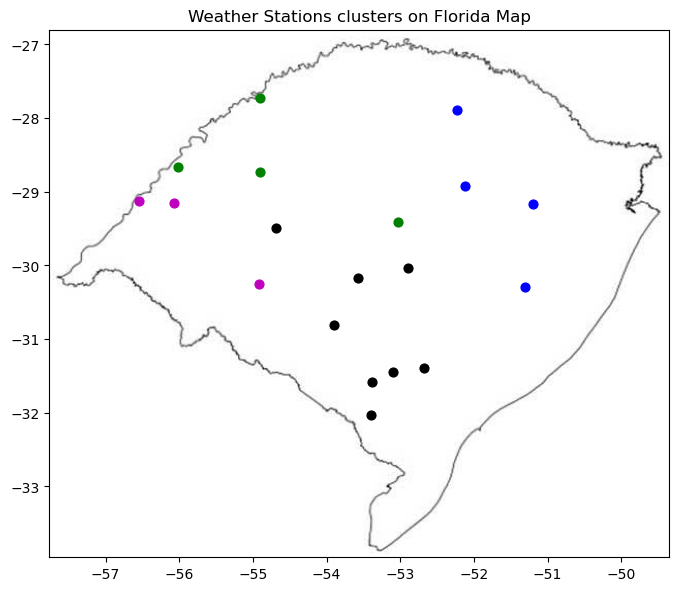

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stations_coord = stations[['StationName','StationID','latitude', 'longitude']]

stations_sort = stations_coord.sort_values('StationID')
df_plot = stations_sort.copy()

BBox = ((-57.766, -49.351, #longitude
          -33.962, -26.800)) #latitude

df_plot['cluster'] = consensus_cluster_4

df_c1 = df_plot.loc[df_plot['cluster'] == 0]
df_c2 = df_plot.loc[df_plot['cluster'] == 1]
df_c3 = df_plot.loc[df_plot['cluster'] == 2]
df_c4 = df_plot.loc[df_plot['cluster'] == 3]

rs_map = plt.imread('rs_map_white.jpeg')
fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(stations_coord.longitude, stations_coord.latitude, zorder=1, alpha=1, c='b', s=10)
ax.scatter(df_c1.longitude, df_c1.latitude, zorder=1, alpha=1, c='k', s=40)
ax.scatter(df_c2.longitude, df_c2.latitude, zorder=1, alpha=1, c='m', s=40)
ax.scatter(df_c3.longitude, df_c3.latitude, zorder=1, alpha=1, c='g', s=40)
ax.scatter(df_c4.longitude, df_c4.latitude, zorder=1, alpha=1, c='b', s=40)
    
ax.set_title('Weather Stations clusters on Florida Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(rs_map, zorder=0, extent = BBox, aspect= 'equal')

In [21]:
# Clusters = 5

from tslearn.clustering import TimeSeriesKMeans

y_pred_array_5 = []
    
for i in range(1,11):
    model_5 = TimeSeriesKMeans(n_clusters=5, metric="softdtw", n_init=10, max_iter=200)
    y_pred_5 = model_5.fit_predict(df_array)
    y_pred_array_5.append(y_pred_5)
        
        
for i in y_pred_array_5:
    print(i)

[2 0 2 1 1 1 4 4 0 2 0 2 2 3 3 3 4 3 3]
[4 2 4 3 3 3 0 0 0 4 4 2 4 1 1 1 0 1 1]
[1 1 1 4 4 4 2 2 3 1 1 1 1 0 0 0 2 0 0]
[1 1 1 0 0 0 4 4 3 1 3 1 1 2 2 2 4 2 2]
[3 0 3 1 1 1 2 2 0 3 0 3 3 1 1 4 2 2 3]
[0 3 0 4 4 4 1 1 3 0 3 0 0 4 2 2 1 2 0]
[2 2 2 4 4 4 1 1 1 2 2 2 2 0 0 3 1 0 0]
[0 0 0 3 3 3 2 2 2 0 2 0 0 1 1 4 2 1 1]
[4 1 4 3 3 3 1 1 1 4 1 4 4 2 2 0 1 2 4]
[3 2 3 1 1 1 0 0 2 3 2 3 3 1 3 4 0 0 3]


In [13]:
consensus_cluster_5 = consensus_clustering(y_pred_array_5, 5, len(y_pred_array_5))
print(consensus_cluster_5)

NameError: name 'y_pred_array_5' is not defined

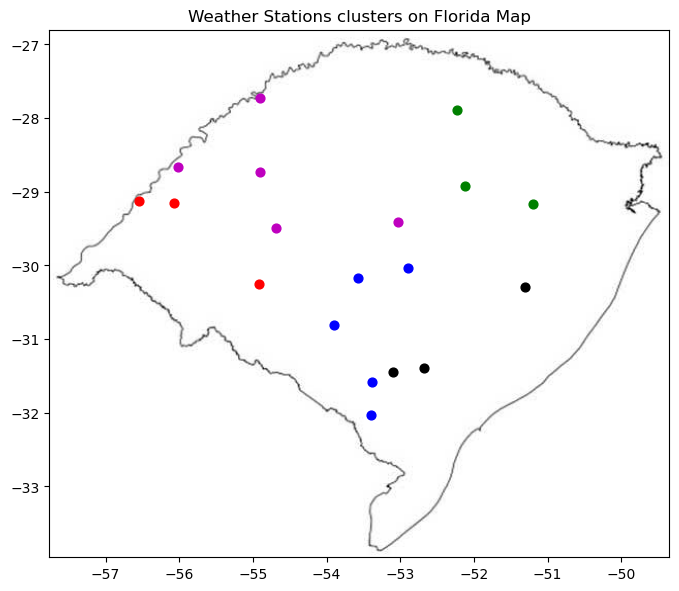

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stations_coord = stations[['StationName','StationID','latitude', 'longitude']]

stations_sort = stations_coord.sort_values('StationID')
df_plot = stations_sort.copy()

BBox = ((-57.766, -49.351, #longitude
          -33.962, -26.800)) #latitude

df_plot['cluster'] = consensus_cluster_5

df_c1 = df_plot.loc[df_plot['cluster'] == 0]
df_c2 = df_plot.loc[df_plot['cluster'] == 1]
df_c3 = df_plot.loc[df_plot['cluster'] == 2]
df_c4 = df_plot.loc[df_plot['cluster'] == 3]
df_c5 = df_plot.loc[df_plot['cluster'] == 4]

rs_map = plt.imread('rs_map_white.jpeg')
fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(stations_coord.longitude, stations_coord.latitude, zorder=1, alpha=1, c='b', s=10)
ax.scatter(df_c1.longitude, df_c1.latitude, zorder=1, alpha=1, c='k', s=40)
ax.scatter(df_c2.longitude, df_c2.latitude, zorder=1, alpha=1, c='b', s=40)
ax.scatter(df_c3.longitude, df_c3.latitude, zorder=1, alpha=1, c='r', s=40)
ax.scatter(df_c4.longitude, df_c4.latitude, zorder=1, alpha=1, c='m', s=40)
ax.scatter(df_c5.longitude, df_c5.latitude, zorder=1, alpha=1, c='g', s=40)
    
ax.set_title('Weather Stations clusters on Florida Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(rs_map, zorder=0, extent = BBox, aspect= 'equal')

In [10]:
# Clusters = 6

from tslearn.clustering import TimeSeriesKMeans

y_pred_array_6 = []
    
for i in range(1,11):
    model_6 = TimeSeriesKMeans(n_clusters=6, metric="softdtw", n_init=10, max_iter=200)
    y_pred_6 = model_6.fit_predict(df_array)
    y_pred_array_6.append(y_pred_6)
        
        
for i in y_pred_array_6:
    print(i)

[0 5 0 4 4 4 2 2 5 0 5 0 0 1 1 3 2 1 1]
[0 0 0 2 2 2 1 1 5 0 0 0 0 3 3 4 1 3 3]
[2 1 2 0 0 0 4 4 3 2 1 2 2 0 5 5 4 5 2]
[3 4 3 5 5 5 0 0 4 3 4 3 3 1 1 2 0 1 3]
[2 2 2 5 5 5 1 1 4 2 1 2 2 0 0 3 1 0 0]
[0 1 0 2 2 2 3 3 1 0 1 0 0 5 5 4 3 5 5]
[4 4 5 0 0 0 3 3 1 5 1 4 5 2 2 2 3 2 2]
[5 5 2 1 1 1 0 0 0 2 2 5 2 4 4 3 0 4 4]
[1 0 1 4 4 4 5 5 0 1 0 1 1 3 3 2 5 2 3]
[2 2 2 3 3 3 1 1 5 2 2 2 2 0 0 4 1 0 0]


In [11]:
consensus_cluster_6 = consensus_clustering(y_pred_array_6, 6, len(y_pred_array_6))
print(consensus_cluster_6)

[2 4 2 3 3 3 0 0 4 2 4 2 2 5 5 1 0 5 5]


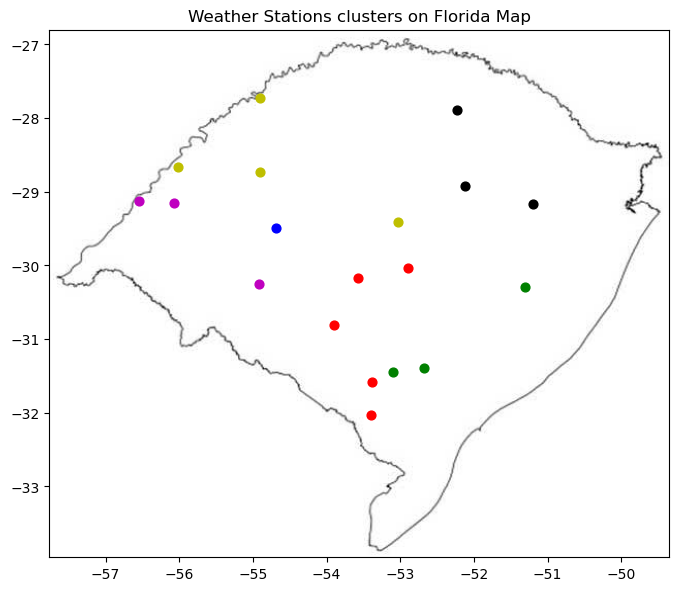

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stations_coord = stations[['StationName','StationID','latitude', 'longitude']]

stations_sort = stations_coord.sort_values('StationID')
df_plot = stations_sort.copy()

BBox = ((-57.766, -49.351, #longitude
          -33.962, -26.800)) #latitude

df_plot['cluster'] = consensus_cluster_6

df_c1 = df_plot.loc[df_plot['cluster'] == 0]
df_c2 = df_plot.loc[df_plot['cluster'] == 1]
df_c3 = df_plot.loc[df_plot['cluster'] == 2]
df_c4 = df_plot.loc[df_plot['cluster'] == 3]
df_c5 = df_plot.loc[df_plot['cluster'] == 4]
df_c6 = df_plot.loc[df_plot['cluster'] == 5]

rs_map = plt.imread('rs_map_white.jpeg')
fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(stations_coord.longitude, stations_coord.latitude, zorder=1, alpha=1, c='b', s=10)
ax.scatter(df_c1.longitude, df_c1.latitude, zorder=1, alpha=1, c='k', s=40)
ax.scatter(df_c2.longitude, df_c2.latitude, zorder=1, alpha=1, c='b', s=40)
ax.scatter(df_c3.longitude, df_c3.latitude, zorder=1, alpha=1, c='r', s=40)
ax.scatter(df_c4.longitude, df_c4.latitude, zorder=1, alpha=1, c='m', s=40)
ax.scatter(df_c5.longitude, df_c5.latitude, zorder=1, alpha=1, c='g', s=40)
ax.scatter(df_c6.longitude, df_c6.latitude, zorder=1, alpha=1, c='y', s=40)
    
ax.set_title('Weather Stations clusters on Florida Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(rs_map, zorder=0, extent = BBox, aspect= 'equal')

In [15]:
# Clusters = 7

from tslearn.clustering import TimeSeriesKMeans

y_pred_array_7 = []
    
for i in range(1,11):
    model_7 = TimeSeriesKMeans(n_clusters=7, metric="softdtw", n_init=10, max_iter=200)
    y_pred_7 = model_7.fit_predict(df_array)
    y_pred_array_7.append(y_pred_7)
        
        
for i in y_pred_array_7:
    print(i)

[1 1 6 2 2 2 0 0 3 6 6 1 6 4 4 5 0 4 4]
[0 6 0 2 2 2 1 1 3 0 0 6 0 5 5 4 1 5 5]
[2 2 0 3 3 3 1 1 5 0 5 2 0 6 6 4 1 4 6]
[5 3 5 1 1 1 0 0 4 5 4 3 5 2 2 6 0 2 5]
[1 6 1 3 3 3 2 2 0 1 6 1 1 5 5 4 2 5 5]
[5 5 1 3 3 3 2 2 4 1 1 5 1 0 0 6 2 0 0]
[2 2 4 0 0 0 5 5 1 4 1 2 4 3 3 6 5 3 4]
[6 6 1 5 5 5 3 3 0 1 0 6 1 2 2 4 3 2 2]
[2 6 2 0 0 0 4 4 3 2 3 6 2 1 1 5 4 5 1]
[6 6 1 3 3 3 2 2 4 1 1 6 1 0 0 5 2 0 0]


In [16]:
consensus_cluster_7 = consensus_clustering(y_pred_array_7, 7, len(y_pred_array_7))
print(consensus_cluster_7)

[4 4 2 6 6 6 5 5 1 2 1 4 2 0 0 3 5 0 0]


/Users/marcosjr/JupyterNotebooks/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


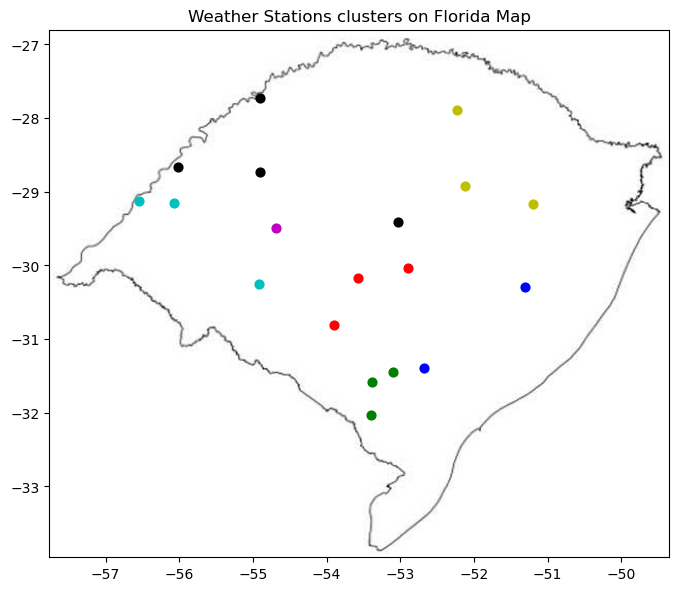

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stations_coord = stations[['StationName','StationID','latitude', 'longitude']]

stations_sort = stations_coord.sort_values('StationID')
df_plot = stations_sort.copy()

BBox = ((-57.766, -49.351, #longitude
          -33.962, -26.800)) #latitude

df_plot['cluster'] = consensus_cluster_7

df_c1 = df_plot.loc[df_plot['cluster'] == 0]
df_c2 = df_plot.loc[df_plot['cluster'] == 1]
df_c3 = df_plot.loc[df_plot['cluster'] == 2]
df_c4 = df_plot.loc[df_plot['cluster'] == 3]
df_c5 = df_plot.loc[df_plot['cluster'] == 4]
df_c6 = df_plot.loc[df_plot['cluster'] == 5]
df_c7 = df_plot.loc[df_plot['cluster'] == 6]

rs_map = plt.imread('rs_map_white.jpeg')
fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(stations_coord.longitude, stations_coord.latitude, zorder=1, alpha=1, c='b', s=10)
ax.scatter(df_c1.longitude, df_c1.latitude, zorder=1, alpha=1, c='k', s=40)
ax.scatter(df_c2.longitude, df_c2.latitude, zorder=1, alpha=1, c='b', s=40)
ax.scatter(df_c3.longitude, df_c3.latitude, zorder=1, alpha=1, c='r', s=40)
ax.scatter(df_c4.longitude, df_c4.latitude, zorder=1, alpha=1, c='m', s=40)
ax.scatter(df_c5.longitude, df_c5.latitude, zorder=1, alpha=1, c='g', s=40)
ax.scatter(df_c6.longitude, df_c6.latitude, zorder=1, alpha=1, c='y', s=40)
ax.scatter(df_c7.longitude, df_c7.latitude, zorder=1, alpha=1, c='c', s=40)
    
ax.set_title('Weather Stations clusters on Florida Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(rs_map, zorder=0, extent = BBox, aspect= 'equal')